<a href="https://colab.research.google.com/github/priyanshuupadhyay15/EDA_Airbnb_NYC/blob/main/EDA_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Airbnb has seen a monumental growth since its establishment in 2008 with the number of rentals growing exponentially every year.
##Airbnb has dramatically affected the traditional hospitality industry as more and more traveller are getting attracted towards the Airbnb as their accomodation provider.
##New York city is the hottest market for Airbnb with over 52,000 listing till the end of November 2018.
##In this colab notebook, I will perform an exploratory data analysis on Airbnb dataset to understand the rental landscape and its effects in New York City.


##**Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

***Importing the Dataset***

In [80]:
airbnb = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project/Airbnb NYC 2019.csv')

1. Data Overview

In [51]:
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


2. Analyzing the shape of dataframe to know about the records and features

In [52]:
airbnb.shape

(48895, 16)

In [53]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

This dataset contains total of 48895 columns and 16 rows.
It contains 16 features named:
id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listing_count, availability_365

3. Descriptive Summary of the dataset


In [54]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Check the duplicate values and drop them

In [55]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace = True)

**Check for null Values in each column**

In [56]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**This can be also done through visualisation to give more clear picture**

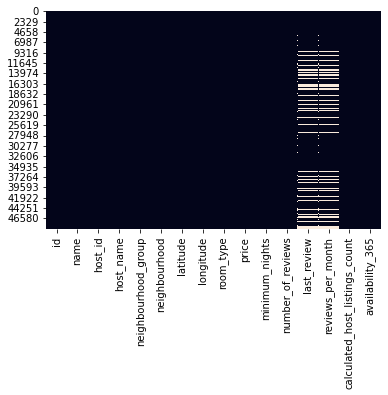

In [57]:
sns.heatmap(airbnb.isnull(), cbar = False)

**The above analysis shows that are 10052 null values in last_review and reviews_per_column.**

**Drop unnecessary columns**

**Columns names 'id', 'last_review' and 'host_name do not seem to have any effect on further analysis. Also column 'host_name' may produce descrimination on the basis of name of hosts. Thus, these columns can be removed.** 

In [81]:
airbnb.drop(['id', 'last_review'], axis= 1, inplace = True)

In [59]:
airbnb.head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [60]:
airbnb.shape

(48895, 14)

Thus, refined dataset contains 48895 rows and 13 columns

Above analysis showed that there were null values in two columns, out of which one column has been removed and the null values in reviews per month column can be replaced by '0'.

In [82]:
airbnb['reviews_per_month'].fillna(0, inplace = True)

In [83]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

##**Exploratory Data Analysis**

**IN this dataset analysis can be done mainly on six features:**
1. Host
2. Price
3. Room Type
4. Location
5. Availability
6. Name of the Location
So, ltes start with the host




Lets start with who is the busiest host and which neighbourhood_group does it belongs

In [73]:
top5_host = list(airbnb['host_id'].value_counts().head(5).index)


In [84]:
print('Top 5 host name: \n')
for i in top5_host:
  print(airbnb[airbnb['host_id'] == i].host_name.unique())

Top 5 host name: 

['Sonder (NYC)']
['Blueground']
['Kara']
['Kazuya']
['Jeremy & Laura']


**The top 5 hosts are**
1. 'Sonder (NYC)'
2. 'Blueground'
3. 'Kara'
4. 'Kazuya'
5. 'Sonder'

In [89]:
busiest_host_areas = (airbnb[airbnb['host_id'].isin(top5_host)].loc[:,['neighbourhood_group','host_id']])

In [91]:
busiest_host_areas.drop_duplicates(inplace = True)

In [92]:
busiest_host_areas

,neighbourhood_group,host_id
5093,Manhattan,16098958
9740,Manhattan,30283594
26137,Manhattan,107434423
32718,Manhattan,137358866
33268,Queens,137358866
36698,Brooklyn,137358866
38293,Manhattan,219517861
39275,Brooklyn,107434423


**The observation from above analysis says that the Manhattan has the busiest hosts**

##**Neighbourhood analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Booking across neighbourhood_groups')

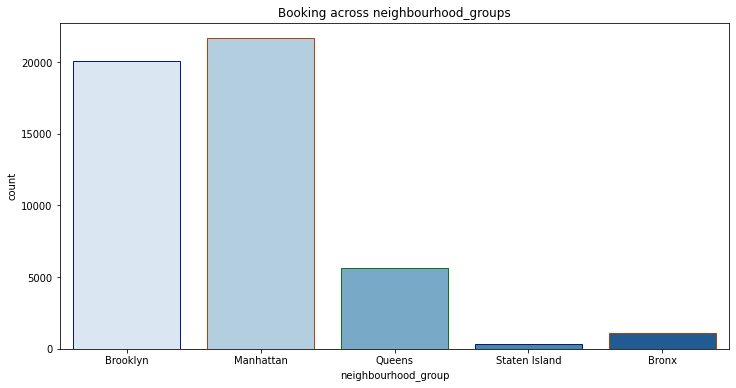

In [106]:
plt.figure(figsize=(12,6))
sns.countplot(airbnb['neighbourhood_group'], palette = 'Blues',edgecolor=sns.color_palette("dark", 3)).set_title( 'Booking across neighbourhood_groups')


**The above visualization shows that 'Manhattan' and 'Brooklyn'are the busiest areas.**